In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


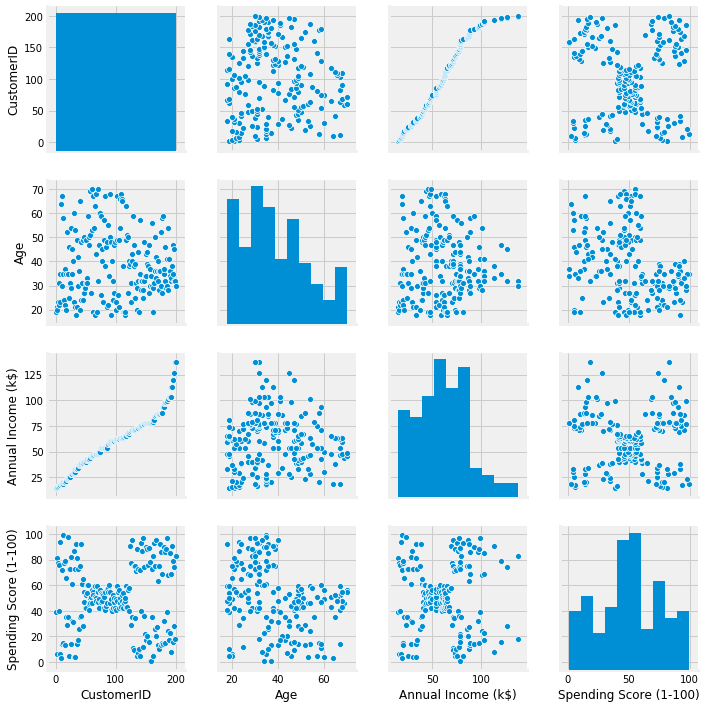

In [3]:
'''pairplot'''
sns.pairplot(df)

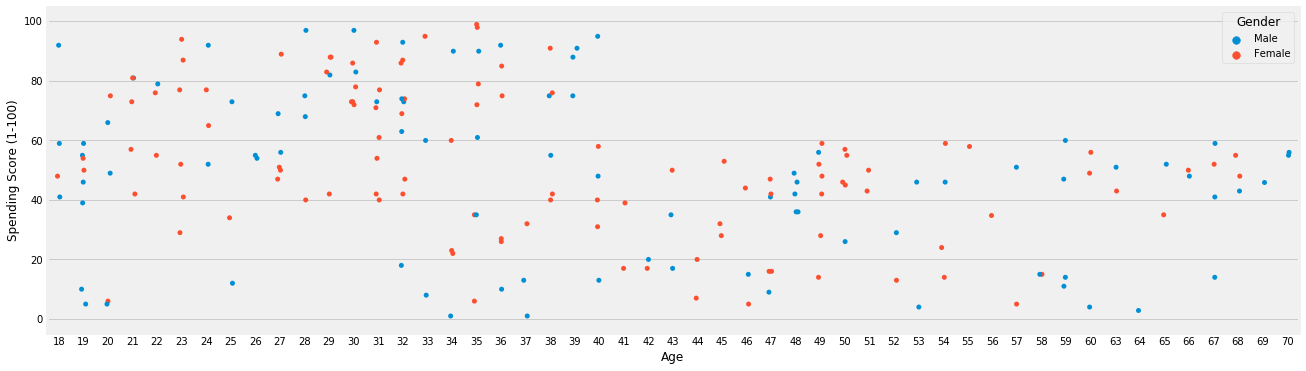

In [4]:
'''How Age related to Annual Income?'''

ax, figsize = plt.subplots(figsize = (20, 6))
sns.stripplot(y = 'Spending Score (1-100)',
             x = 'Age', 
             hue = 'Gender',
             data = df)

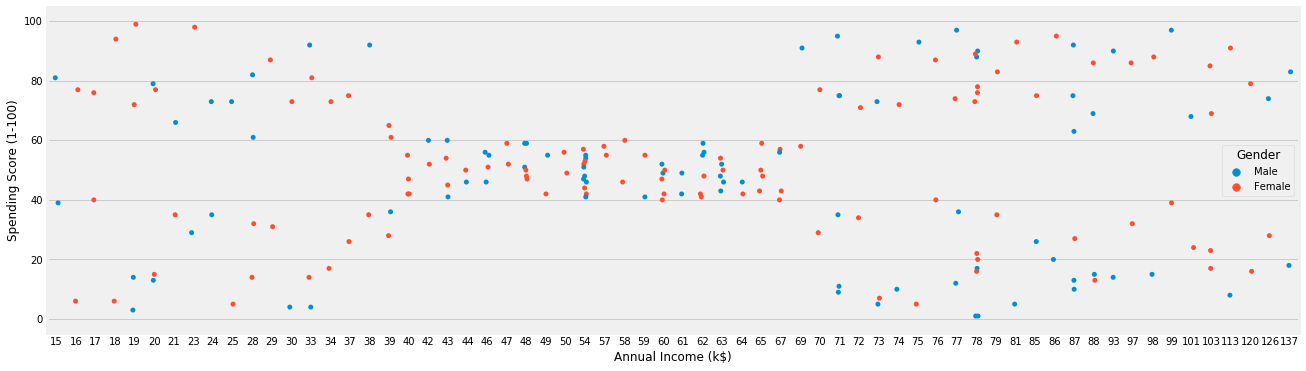

In [5]:
'''How Annual Income and Spending Score related?'''
ax, figsize = plt.subplots(figsize = (20, 6))
sns.stripplot(y = 'Spending Score (1-100)',
             x = 'Annual Income (k$)', 
             hue = 'Gender',
             data = df)

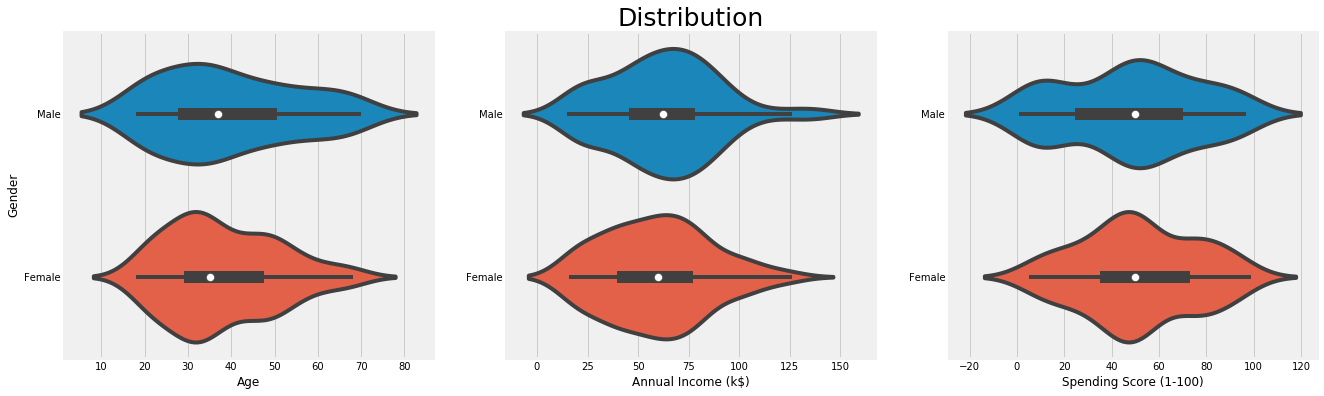

In [6]:
'''Columns and their distributions'''
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
n = 1
ax, figsize = plt.subplots(figsize = (20, 6))
for col in cols:
    plt.subplot(1, 3, n)
    sns.violinplot(y = 'Gender',
                   x = col,
                   data = df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Distribution' if n == 2 else '', size = 25)
    n+=1


In [7]:
X = df[['Spending Score (1-100)', 'Annual Income (k$)']].values

In [8]:
'''Use k-Means Clustering model to analyze behaviors of this dataset'''
from sklearn.cluster import KMeans

km_iner = []
for i in range(1, 12):
    km = KMeans(n_clusters = i)
    km.fit(X)
    km_iner.append(km.inertia_)

Text(0.5, 0, 'Number of clusters')

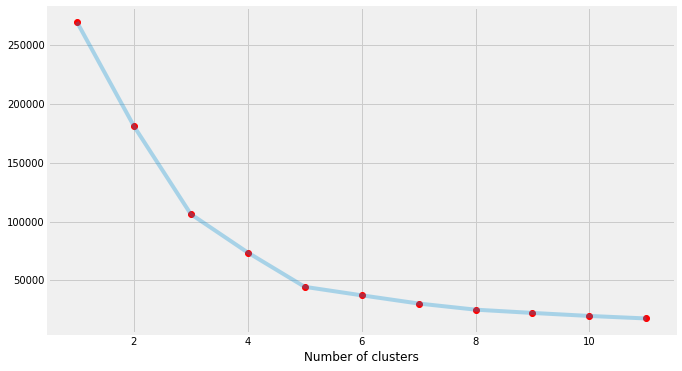

In [9]:
'''Use up to cluster of 12 to choose the most fit one '''
plt.figure(1, (10, 6))
plt.plot(range(1, 12), km_iner, 'ro')
'''range(1, 12) = np.arange(1, 12) same thing'''
plt.plot(np.arange(1, 12), km_iner, '-', alpha = 0.3)
plt.xlabel('Number of clusters')


The line changes rapidly at cluster = 3 and 5.

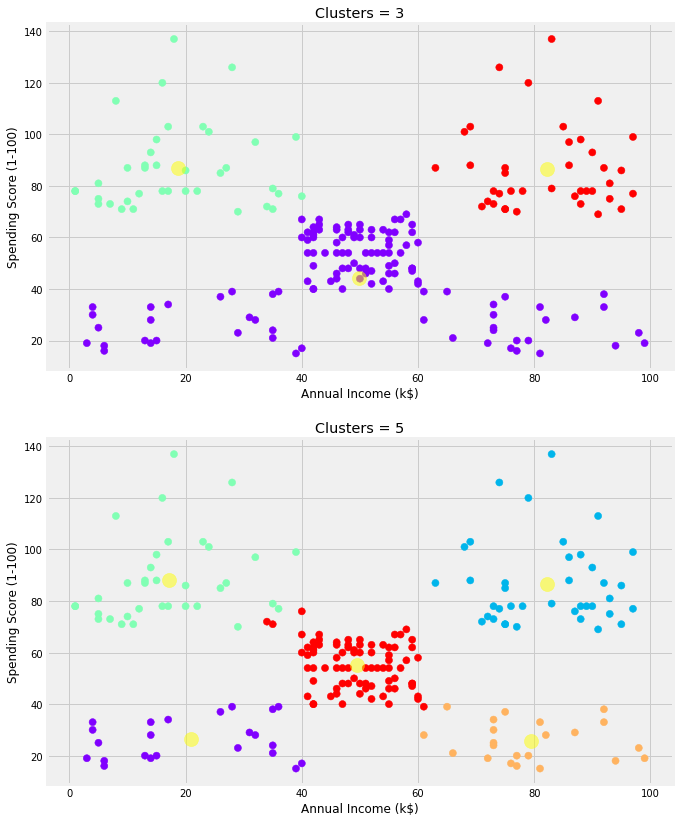

In [10]:
n_clus = [3, 5]
n = 1
ax, figsize = plt.subplots(figsize = (10, 14))
for i in n_clus:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    '''or can use in one line:
    y_means = KMeans(n_clusters = i).fit_predict(X)'''
    plt.subplot(2, 1, n)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:,1], c = 'yellow', s = 200, alpha = 0.5)
    plt.title('Clusters = 3' if n == 1 else 'Clusters = 5')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    n+=1